In [52]:
import pandas as pd
import numpy as np

In [53]:
df = pd.read_csv("test_df.csv")
df = pd.read_csv("train_df.csv")
df

,Unnamed: 0,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [54]:
print(df[["GrLivArea", "BedroomAbvGr", "FullBath", "SalePrice"]].head())

   GrLivArea  BedroomAbvGr  FullBath  SalePrice
0       1710             3         2     208500
1       1262             3         2     181500
2       1786             3         2     223500
3       1717             3         1     140000
4       2198             4         2     250000


In [55]:
print("=======Missing values====== ")
print(df[["GrLivArea", "BedroomAbvGr", "FullBath", "SalePrice"]].isnull().sum())

=======Missing values====== 
GrLivArea       0
BedroomAbvGr    0
FullBath        0
SalePrice       0
dtype: int64


In [56]:
cols = ['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']
df = df[cols].dropna()
df

,GrLivArea,BedroomAbvGr,FullBath,SalePrice
0,1710,3,2,208500
1,1262,3,2,181500
2,1786,3,2,223500
3,1717,3,1,140000
4,2198,4,2,250000
...,...,...,...,...
1455,1647,3,2,175000
1456,2073,3,2,210000
1457,2340,4,2,266500
1458,1078,2,1,142125


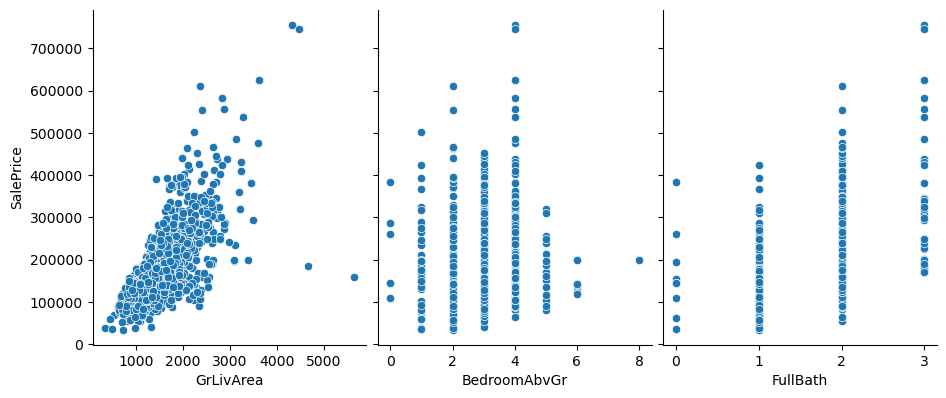

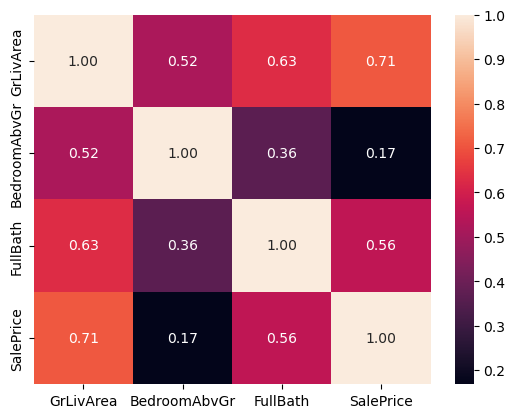

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, x_vars=['GrLivArea','BedroomAbvGr','FullBath'], y_vars='SalePrice', height=4, aspect=0.8)
plt.show()

sns.heatmap(df.corr(), annot=True, fmt=".2f")
plt.show()


In [58]:
from sklearn.model_selection import train_test_split
X = df[["GrLivArea", "BedroomAbvGr", "FullBath"]]
Y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

print("Intercept: ", model.intercept_)
print("Coefficients: ", list(zip(X.columns, model.coef_)))

Intercept:  52261.74862694461
Coefficients:  [('GrLivArea', 104.02630701226441), ('BedroomAbvGr', -26655.165357341273), ('FullBath', 30014.324108956604)]


In [60]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mse**0.5

r2 = r2_score(y_test, y_pred)

print(f"RMSE: $ {rmse:,.2f}")
print(f"R2: {r2:.4f}")


RMSE: $ 52,975.72
R2: 0.6341


In [61]:
new_house = [[2500, 3, 2]]
pred_price = model.predict(new_house)
print(f"Predicted Price:$ {pred_price[0]:,.2f}")

Predicted Price:$ 292,390.67


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


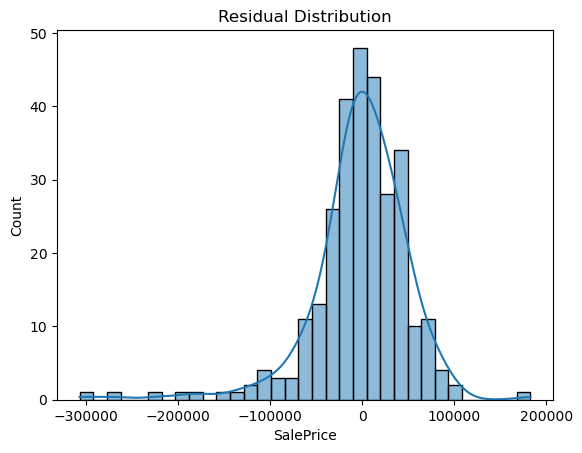

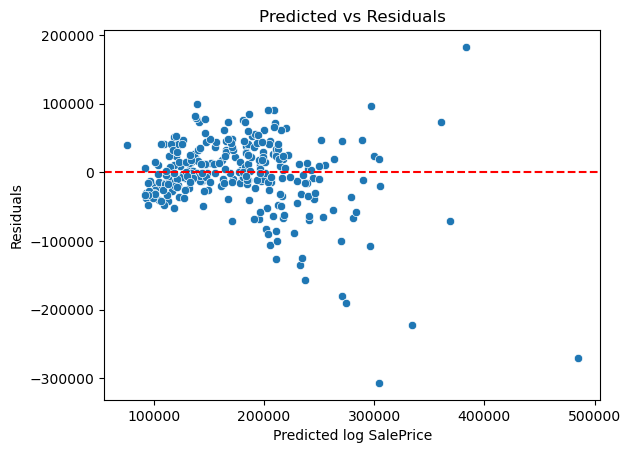

In [63]:
residuals = y_pred - y_test
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution")
plt.show()

sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle="--", color="red")
plt.xlabel("Predicted log SalePrice")
plt.ylabel("Residuals")
plt.title("Predicted vs Residuals")
plt.show()
